In [5]:
# Matrix plotting from Nilearn: nilearn.plotting.plot_matrix
import numpy as np
import matplotlib.pylab as plt
import glob
import numpy
import pandas as pd
from nilearn.connectome import ConnectivityMeasure

def plot_matrices(matrices, matrix_kind):
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject {1}'.format(matrix_kind, n_subject)
        plotting.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                             title=title, figure=fig, colorbar=False)
        
    #fig.savefig("test_1.png")
        

/Users/nikkibytes/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### prepare data

In [6]:
#files=glob.glob('/Users/nikkibytes/Documents/niblunc/data/sub-*')
files=glob.glob('/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/output/timeseries/rl/subs/sub-*')
reward_subjects = []
punish_subjects = []
pooled_subjects = []

for f in sorted(files):
    print(f)
    array=numpy.loadtxt(f)
    #print(array)
    pooled_subjects.append(array)
    if "punish" in f.split("/")[-1]:
        punish_subjects.append(array)
    else:
        reward_subjects.append(array)
#print("Reward: {} \nPunish: {} \nPooled: {} \n".format(reward_subjects, punish_subjects, pooled_subjects))

In [7]:
#roi_datafile = "/Users/nikkibytes/Documents/niblunc/data/betaseries_rois.txt"
roi_datafile = "/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/betaseries_rois.txt"
roi_df = pd.read_csv(roi_datafile, sep="\t")
#print(roi_df.head())
roi_df.set_index("Region", inplace=True)
roi_coords = [tuple(x) for x in roi_df.to_records(index=False)]


Correlations of subjects are stacked in an array of shape (8, 28, 28)
Mean correlation has shape (28, 28).


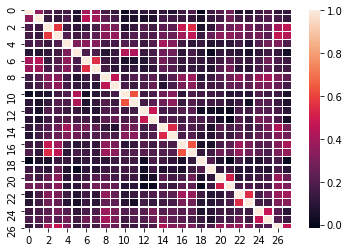

In [35]:
rwd_correlation_measure = ConnectivityMeasure(kind='correlation')

rwd_correlation_matrices = rwd_correlation_measure.fit_transform(reward_subjects)
# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of subjects are stacked in an array of shape {0}'
      .format(rwd_correlation_matrices.shape))
rwd_mean_correlation_matrix = rwd_correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(rwd_mean_correlation_matrix.shape))
from nilearn import plotting
#plt.matshow(rwd_mean_correlation_matrix,cmap='hot')
import numpy as np
import seaborn as sns

ax = sns.heatmap(rwd_mean_correlation_matrix, linewidth=0.5)
plt.show()
#plot_matrices(rwd_correlation_matrices[:5], 'reward')
#plot_matrices(rwd_mean_correlation_matrix, 'reward')

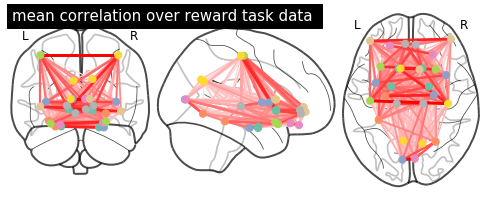

In [10]:
plotting.plot_connectome(mean_correlation_matrix, roi_coords,
                         title='mean correlation over reward task data ')

### Punish Task

Correlations of subjects are stacked in an array of shape (8, 28, 28)
Mean correlation has shape (28, 28).


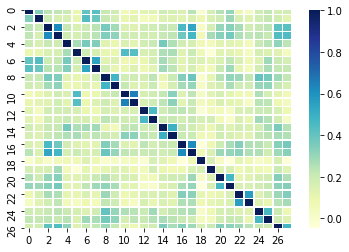

In [37]:
ph_correlation_measure = ConnectivityMeasure(kind='correlation')

ph_correlation_matrices = ph_correlation_measure.fit_transform(punish_subjects)

# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of subjects are stacked in an array of shape {0}'
      .format(ph_correlation_matrices.shape))
ph_mean_correlation_matrix = ph_correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(ph_mean_correlation_matrix.shape))

ax = sns.heatmap(ph_mean_correlation_matrix, linewidth=0.5, cmap="YlGnBu")
plt.show()
#plot_matrices(ph_correlation_matrices[:5], 'punish')

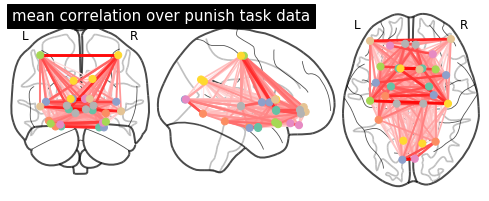

In [17]:
plotting.plot_connectome(ph_mean_correlation_matrix, roi_coords,
                         title='mean correlation over punish task data')

### Partial and tangent 

In [19]:
type(ph_mean_correlation_matrix)

numpy.ndarray

In [ ]:
partial_correlation_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrices = partial_correlation_measure.fit_transform(punish_subjects)

In [ ]:
plot_matrices(partial_correlation_matrices[:4], 'partial')
plotting.plot_connectome(
    partial_correlation_measure.mean_, roi_coords,
    title='mean partial correlation over subjects')

In [ ]:
tangent_measure = ConnectivityMeasure(kind='tangent')
tangent_matrices = tangent_measure.fit_transform(subjects)

In [ ]:
plot_matrices(tangent_matrices[:4], 'tangent variability')
plotting.plot_connectome(
    tangent_measure.mean_, roi_coords,
    title='mean tangent connectivity over subjects')

In [ ]:
connectivity_biomarkers = {}
kinds = ['correlation', 'partial correlation', 'tangent']
for kind in kinds:
    conn_measure = ConnectivityMeasure(kind=kind, vectorize=True)
    connectivity_biomarkers[kind] = conn_measure.fit_transform(pooled_subjects)

# For each kind, all individual coefficients are stacked in a unique 2D matrix.
print('{0} correlation biomarkers for each subject.'.format(
    connectivity_biomarkers['correlation'].shape[1]))